In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from keras.datasets import mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

2024-04-26 05:24:03.410552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 05:24:03.410704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 05:24:03.634432: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
trainImages.shape

(60000, 28, 28)

In [3]:
print(len(testLabels))
print(testLabels)

10000
[7 2 1 ... 4 5 6]


In [5]:
from keras import models
from keras import layers


# Modify the shape of the images
trainImages = trainImages.reshape((60000, 28 * 28))
testImages = testImages.reshape((10000, 28 * 28))

# scale the values in the range [0, 1]
trainImages = trainImages.astype('float32')/255
testImages = testImages.astype('float32')/255

numClasses = 10
# Use one-hot encoding to chage the train and test labels into categorical
from keras.utils import to_categorical
trainLabels = to_categorical(trainLabels, numClasses)
testLabels = to_categorical(testLabels, numClasses)


network = models.Sequential() # Create sequential networks
# Create two dense layers, one with relu activation and other with softmax activation
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

# Specify the optimizer and the loss function, also specify the metric for evaluation
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Run the network that is built
network.fit(trainImages, trainLabels, epochs = 5, batch_size = 128)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8712 - loss: 0.4378
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9675 - loss: 0.1143
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9784 - loss: 0.0745
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9892 - loss: 0.0376


In [6]:
testLoss , testAcc = network.evaluate(testImages, testLabels)
print(testAcc, testLoss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0783
0.9807000160217285 0.06325962394475937


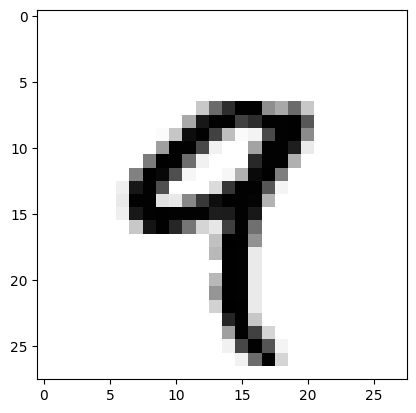

In [7]:
import matplotlib.pyplot as plt
plt.imshow(trainImages[4], cmap = plt.cm.binary)
plt.show()

**Broadcasting**

The smaller tensor  will be broadcasted to match the shape of the larger tensor

Two tensor element-wise operations are allowed if one tensor has shape *(a, b, ..., n, n+1, ..., m)* and other has the shape *(n, n+1, ..., m)*. The broadcasting will then automatically happen for axes *a* through *n-1*

In [6]:
# Example
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
y = [0]*32
x = []
for i in y:
    x.append([i]*10)
x = np.array(x)
print(x.shape)
y = np.arange(0,10)
print(y.shape)
z = x + y
print(z)

(32, 10)
(10,)
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


In [2]:
from keras.datasets import imdb
(trainData, trainLabels), (testData, testLabels) = imdb.load_data(num_words=10000)
# the data cannot have a value greater than 10000

2024-05-01 08:38:35.679481: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 08:38:35.679608: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 08:38:35.838877: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print(len(trainData), len(trainData[3]), len(testData), len(testLabels))

25000 550 25000 25000


In [10]:
import numpy as np
def vectorizeData(data, dimensions = 10000):    
    resultData = np.zeros((len(data), dimensions))
    for i, dataPoint in enumerate(data):
        resultData[i, dataPoint] = 1.
    return resultData
xTrain = vectorizeData(trainData)
xTest = vectorizeData(testData)

In [12]:
yTrain = np.asarray(trainLabels).astype('float32')
yTest = np.asarray(testLabels).astype('float32')

In [16]:
trainLabels

array([1, 0, 0, ..., 0, 1, 0])